# Example usage of the BTD class

In [1]:
import pybbtd.btd as btd
from pybbtd.solvers import btd_als
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define tensor size and BTD parameters
N1, N2, N3 = 80, 100, 4  # dimensions of the tensor
R = 3  # number of BTD terms
L = 5  # rank of each term

# Generate BTD model
X = btd.BTD([N1, N2, N3], R, L, block_mode="LL1")

Sufficient condition for uniqueness satisfied


In [3]:
# Create ground truth tensor
A0, B0, C0 = btd_als.init_BTD_factors(X, strat="random")
theta = X.get_constraint_matrix()
T_observed = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 1 * 1e-6 * np.random.randn(*X.dims)

Exiting early due to unsufficient decrease of cost


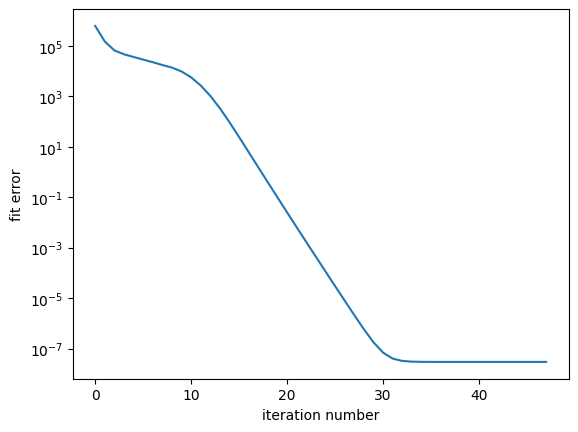

In [4]:
# Fit the model using random initialization
X.fit(T_observed, max_iter=3000, init="random", rel_tol=1e-9, abs_tol=1e-15)

# Save the fit error for comparison with SVD init
rand_init_fit_error = X.fit_error

# Retrieve the estimated factors if necessary
A_est, B_est, C_est = X.factors

# Check convergence curve
fig, ax = plt.subplots()
ax.semilogy(X.fit_error)
ax.set_ylabel("fit error")
_ = ax.set_xlabel("iteration number")

In [33]:
A_est, B_est, C_est = X.factors

Exiting early due to unsufficient decrease of cost


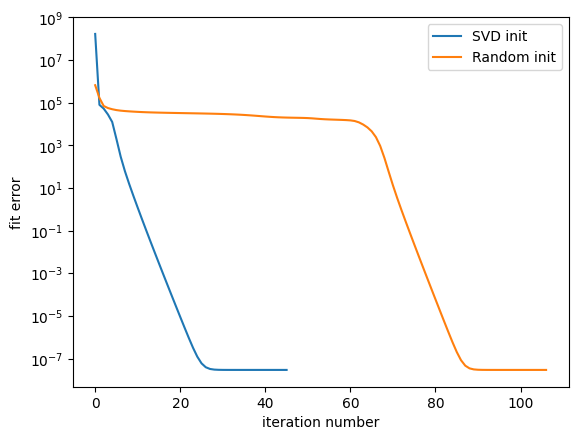

In [32]:
# compare with SVD init

X.fit(T_observed, max_iter=3000, init="svd", rel_tol=1e-9, abs_tol=1e-15)
svd_init_fit_error = X.fit_error

fig, ax = plt.subplots()
ax.semilogy(svd_init_fit_error, label="SVD init")
ax.semilogy(rand_init_fit_error, label="Random init")
ax.set_ylabel("fit error")
ax.set_xlabel("iteration number")
_ = ax.legend()